In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd

import analysis as a 

In [3]:
rmatrix = a.rmatrices('100118','103118', 10)
rmatrix

expected number of matrices: 3


[             BTC-USD   ETH-USD   BNB-USD   XRP-USD   ADA-USD  DOGE-USD  \
 2018-10-02 -0.005100 -0.015666  0.040708 -0.101471 -0.023283 -0.020058   
 2018-10-03 -0.008195 -0.029899 -0.008299  0.013966 -0.021260 -0.020820   
 2018-10-04  0.011331  0.007811 -0.001520 -0.002950  0.006354 -0.010398   
 2018-10-05  0.006938  0.023935  0.036439 -0.014499  0.020537  0.004243   
 2018-10-06 -0.005173 -0.010961 -0.025144 -0.061471 -0.020549 -0.022116   
 2018-10-07  0.002220  0.004428  0.014064 -0.012458  0.040437  0.003061   
 2018-10-08  0.007436  0.013774 -0.001179  0.015872  0.022761  0.002873   
 2018-10-09 -0.001443 -0.005568 -0.011651 -0.020409 -0.002891  0.010167   
 2018-10-10 -0.008635 -0.009754 -0.005494 -0.037086 -0.019622 -0.014839   
 2018-10-11 -0.051295 -0.175129 -0.104702 -0.188028 -0.177047 -0.104720   
 
              TRX-USD   ETC-USD   LTC-USD  LINK-USD  ...   RFR-USD   UPP-USD  \
 2018-10-02  0.001858 -0.003744 -0.008384 -0.012771  ...  0.046963 -0.031984   
 2018-10-03 -

In [4]:
raverages = [m.mean().mean() for m in rmatrix]
corrmatrix = [i.corr(method='pearson') for i in rmatrix]
corraverages = [i.mean().mean() for i in corrmatrix]

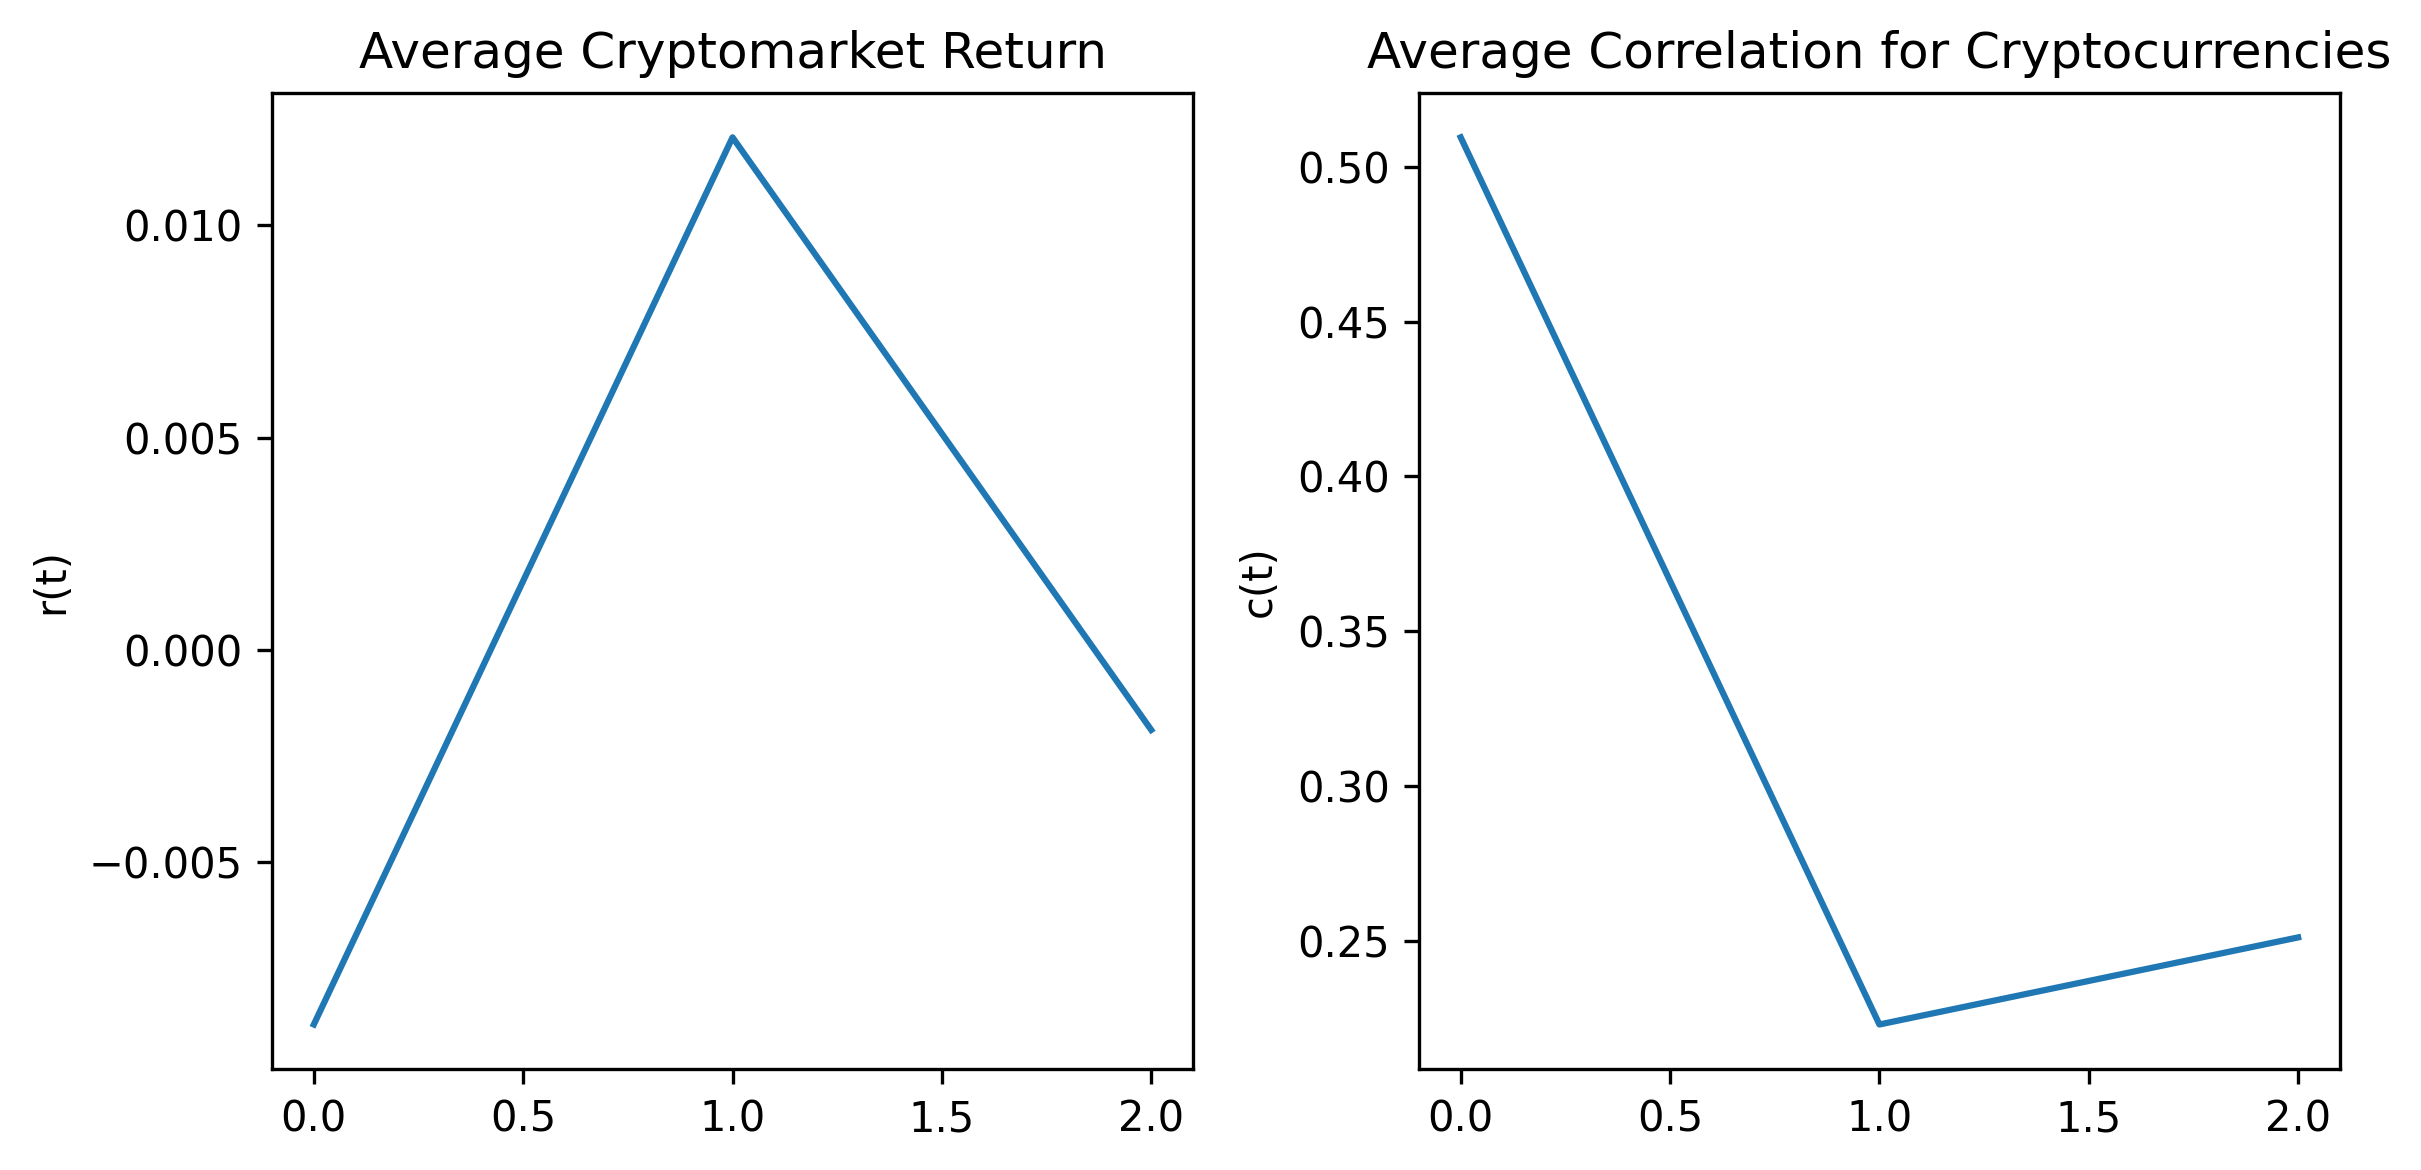

In [5]:
fig, axes = plt.subplots(1,2, figsize=(8,4), dpi=300)
axes[0].plot(raverages)
axes[0].set_ylabel("r(t)")
axes[0].set_title('Average Cryptomarket Return')

axes[1].plot(corraverages)
axes[1].set_ylabel("c(t)")
axes[1].set_title('Average Correlation for Cryptocurrencies')
plt.tight_layout()

In [6]:
supcorrmatrix = a.noisesupression(corrmatrix, 0.2)
simmatrix = a.getsimmatrix(supcorrmatrix)

matrix shape: (3, 3)


In [7]:
simtrans = a.getsimtrans(simmatrix)

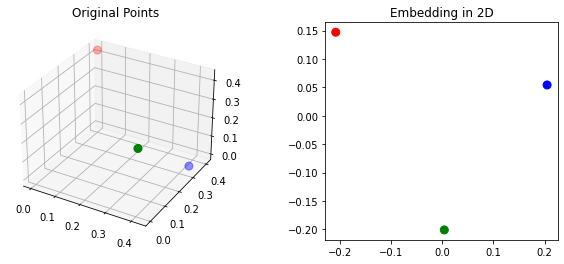

In [8]:
colors = ['r', 'g', 'b']
size = [64, 64, 64]
fig = plt.figure(2, (10,4))
ax = fig.add_subplot(121, projection='3d')
plt.scatter(simmatrix[:,0], simmatrix[:,1], zs=simmatrix[:,2], s=size, c = colors)
plt.title('Original Points')

ax = fig.add_subplot(122)
plt.scatter(simtrans[:,0], simtrans[:,1], s=size, c=colors)
plt.title('Embedding in 2D')
fig.subplots_adjust(wspace=.4, hspace=0.5)
plt.show()

In [9]:
simtrans, simmatrix

(array([[-0.20877525,  0.14694671],
        [ 0.00375151, -0.20107563],
        [ 0.20502374,  0.05412893]]),
 array([[0.        , 0.40592118, 0.42435394],
        [0.40592118, 0.        , 0.32701701],
        [0.42435394, 0.32701701, 0.        ]]))

In [10]:
print(a.intraclusterdist(simtrans, 2))

(0.10834096291898328, 0.0)


# Dynamics of the correlation structure